# Setup

In [3]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('seaborn')

# SIR Model Dynamics

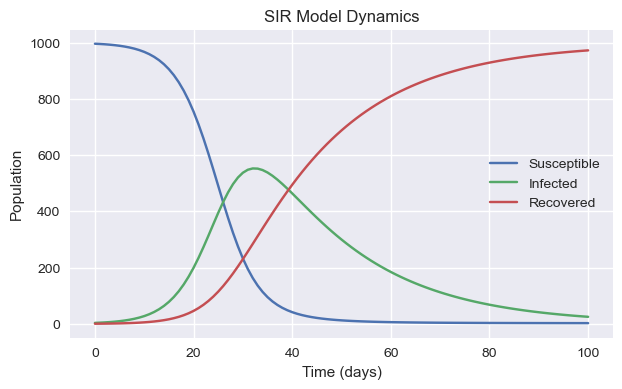

In [5]:
susceptible = []
infected = []
recovered = []

beta = 0.3
gamma = 0.05

N = 1000
initial_infected = 3

# Initialise the variables
susceptible.append(N - initial_infected)
infected.append(initial_infected)
recovered.append(0)

for t in range(100):
    susceptible.append(susceptible[t] - beta * susceptible[t] * infected[t] / N)
    infected.append(infected[t] + beta * susceptible[t] * infected[t] / N - gamma * infected[t])
    recovered.append(recovered[t] + gamma * infected[t])
    
plt.figure(figsize=(7, 4))    
plt.title('SIR Model Dynamics')
plt.xlabel('Time (days)')
plt.ylabel('Population')
    
plt.plot(susceptible, label='Susceptible')
plt.plot(infected, label='Infected')
plt.plot(recovered, label='Recovered')

plt.legend()
plt.show()

# Mathematical vs Stochastic

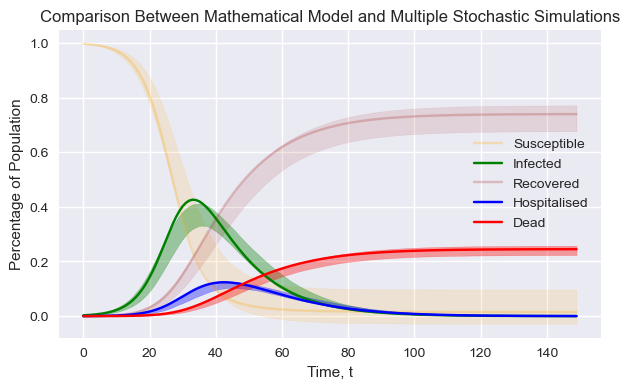

In [8]:
run_folder = 'mathematical'

run_folder_path = os.path.join(os.path.abspath('../'), 'records', run_folder)

mathematical_df = pd.read_csv(os.path.join(run_folder_path, 'mathematical.csv'))
stochastic_states_df = pd.read_csv(os.path.join(run_folder_path, 'states.csv'))

X = mathematical_df['Time'].values

params = {
    'Susceptible': {
        'Color': 'orange',
        'Alpha': 0.25,
        'FillAlpha': 0.125,
    },
    'Infected': {
        'Color': 'green',
        'Alpha': 1,
        'FillAlpha': 0.35,
    },
    'Recovered': {
        'Color': 'brown',
        'Alpha': 0.25,
        'FillAlpha': 0.125,
    },
    'Hospitalised': {
        'Color': 'blue',
        'Alpha': 1,
        'FillAlpha': 0.35,
    },
    'Dead': {
        'Color': 'red',
        'Alpha': 1,
        'FillAlpha': 0.35,
    },
}

plt.figure(figsize=(7, 4))
plt.title('Comparison Between Mathematical Model and Multiple Stochastic Simulations')
plt.xlabel('Time, t')
plt.ylabel('Percentage of Population')

for key in params.keys():
    plt.plot(X, mathematical_df[key].values, color=params[key]['Color'], label=key, alpha=params[key]['Alpha'])
    
    y1 = stochastic_states_df[key].values + stochastic_states_df[key + '_STD'].values
    y2 = stochastic_states_df[key].values - stochastic_states_df[key + '_STD'].values
    
    plt.fill_between(X, y1, y2, alpha=params[key]['FillAlpha'], color=params[key]['Color'])

plt.legend()
plt.show()